In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

In [5]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

1. Data Collection

In [7]:
len(glob.glob(r'/Users/sviatlana_antonava/DA/DA Real-World projects/S&P Stock (time series project)/individual_stocks_5yr/*csv'))

505

In [ ]:
# lets store files of those stock that we have to consider for analysis

In [9]:
company_list = [
    r'/Users/sviatlana_antonava/DA/DA Real-World projects/S&P Stock (time series project)/individual_stocks_5yr/AAPL_data.csv',
    r'/Users/sviatlana_antonava/DA/DA Real-World projects/S&P Stock (time series project)/individual_stocks_5yr/AMZN_data.csv',
    r'/Users/sviatlana_antonava/DA/DA Real-World projects/S&P Stock (time series project)/individual_stocks_5yr/GOOG_data.csv',
    r'/Users/sviatlana_antonava/DA/DA Real-World projects/S&P Stock (time series project)/individual_stocks_5yr/MSFT_data.csv'
]

In [11]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df], ignore_index=True)

In [13]:
all_data.shape

(4752, 7)

In [15]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [17]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

2. Analysing change in price of the stock overtime

In [19]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [21]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [23]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [25]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [27]:
tech_list = all_data['Name'].unique()

In [29]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

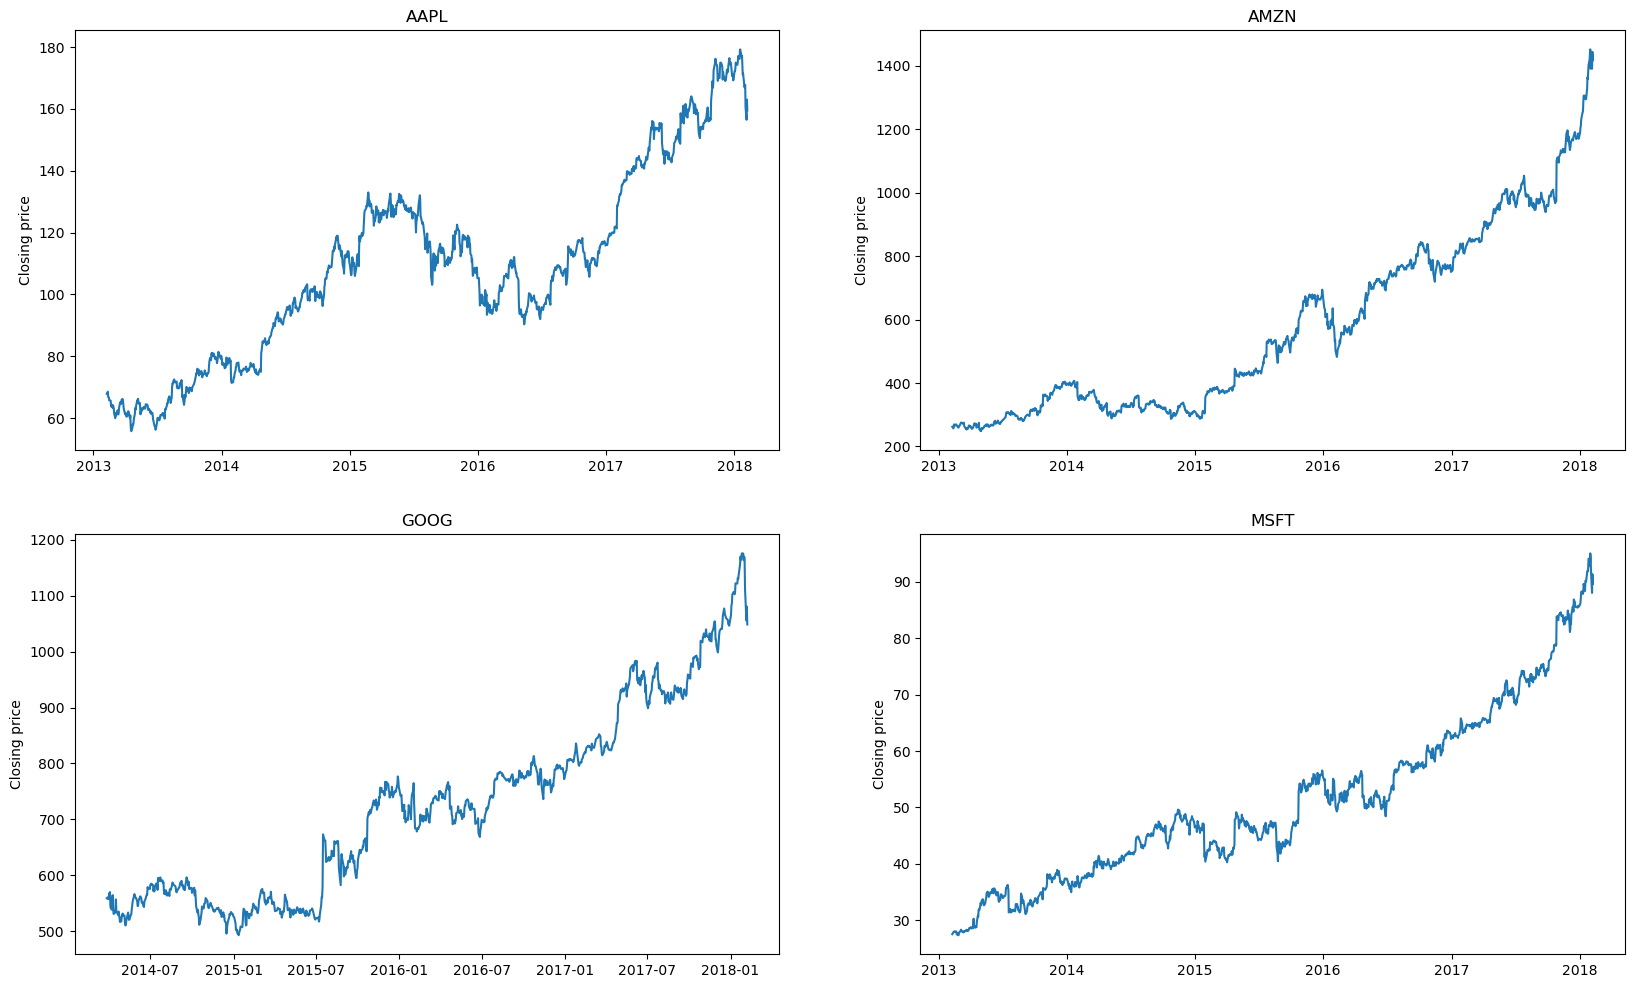

In [35]:
plt.figure(figsize = (20,12))
for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)      ## creating subplot for each stock
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])     ## plotting "date" vs "close"
    plt.ylabel('Closing price')
    plt.title(company)

3. moving average of the various stocks

In [37]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [39]:
new_data = all_data.copy()

In [41]:
ma_day = [10, 20, 30]    ## different windows of rolling: 10, 20, 30 days

for ma in ma_day:
    new_data['close_' + str(ma)] = new_data['close'].rolling(ma).mean()

In [43]:
new_data

date     open     high      low    close     volume  Name  \
0    2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1    2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2    2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3    2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4    2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   
...         ...      ...      ...      ...      ...        ...   ...   
4747 2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT   
4748 2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT   
4749 2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT   
4750 2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT   
4751 2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT   

      close_10  close_20   close_30  
0          NaN       NaN        NaN  
1          NaN       NaN        NaN  
2          NaN       NaN        NaN  
3          NaN       NaN        NaN  
4          NaN       NaN        NaN  
...        ...       ...        ...  
4747    92.765   90.6770  89.019000  
4748    92.943   90.9105  89.217333  
4749    92.582   90.9010  89.300000  
4750    92.525   91.0535  89.494333  
4751    92.304   91.1230  89.631000  

[4752 rows x 10 columns]

In [45]:
new_data.set_index('date', inplace=True)

In [47]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_30'],
      dtype='object')

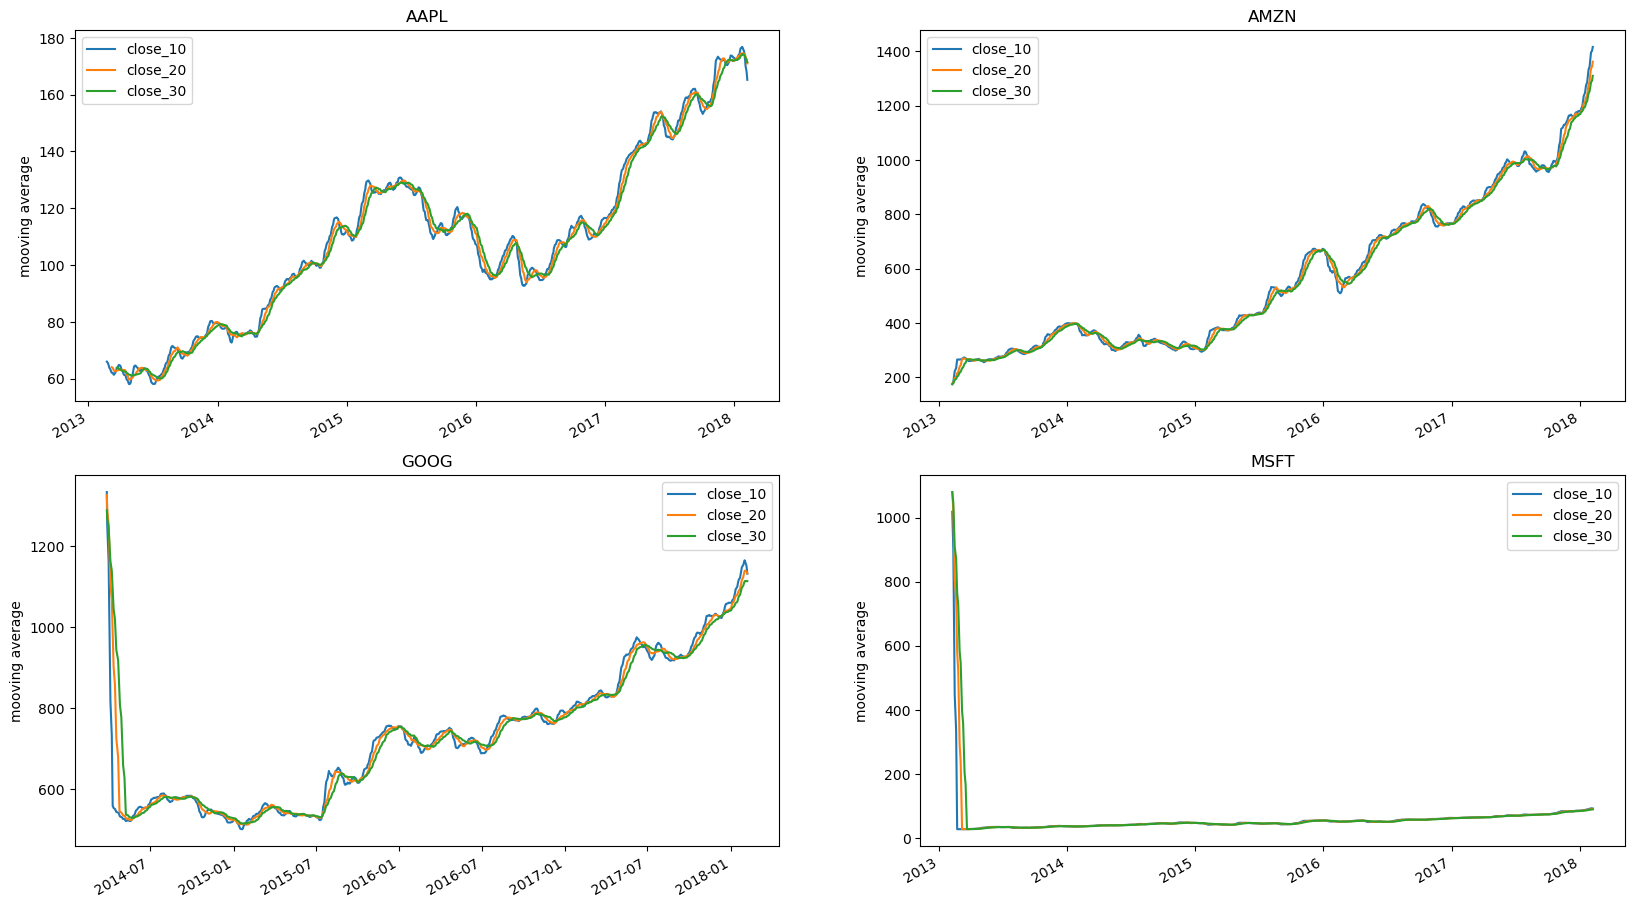

In [53]:
plt.figure(figsize = (20,12))
for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close_10', 'close_20', 'close_30']].plot(ax=plt.gca())
    plt.xlabel('')
    plt.ylabel('mooving average')
    plt.title(company)

4. analyse Closing price change in apple stock

In [55]:
apple = pd.read_csv(r'/Users/sviatlana_antonava/DA/DA Real-World projects/S&P Stock (time series project)/individual_stocks_5yr/AAPL_data.csv')

In [57]:
apple

date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]

In [59]:
apple['Daily return (in %)'] = apple['close'].pct_change() * 100

In [61]:
apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily return (in %)  
0                  NaN  
1             1.042235  
2            -2.506658  
3            -0.190297  
4            -0.089934

In [63]:
import plotly.express as px

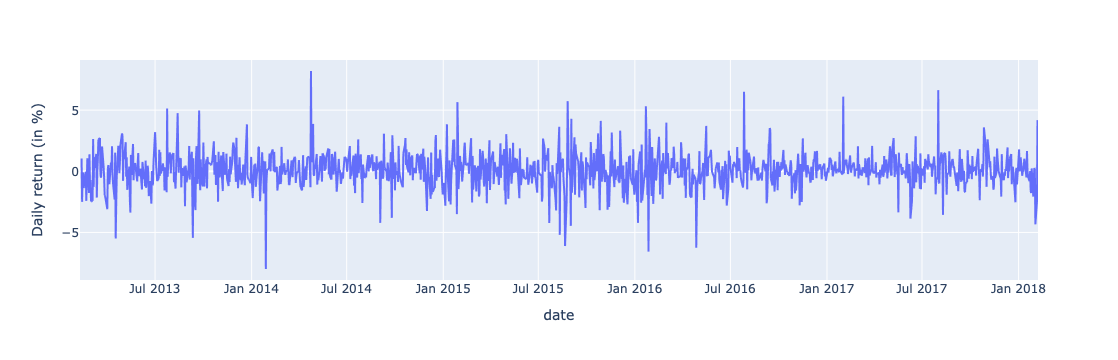

In [65]:
px.line(apple, x='date', y='Daily return (in %)')

5. Performing resampling analysis of closing price

In [67]:
apple.dtypes

date                    object
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
Daily return (in %)    float64
dtype: object

In [69]:
apple['date'] = pd.to_datetime(apple['date'])

In [73]:
apple.set_index('date', inplace=True)

In [75]:
apple.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            Daily return (in %)  
date                             
2013-02-08                  NaN  
2013-02-11             1.042235  
2013-02-12            -2.506658  
2013-02-13            -0.190297  
2013-02-14            -0.089934

In [77]:
apple['close'].resample('M').mean() ## resample data on monthly basis

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

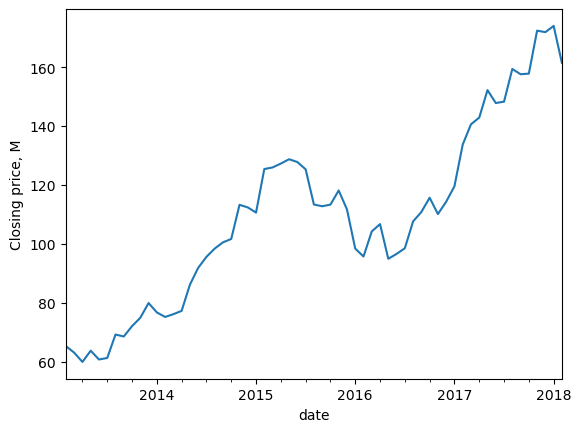

In [95]:
apple['close'].resample('M').mean().plot()
plt.ylabel('Closing price, M')
plt.show()

In [85]:
apple['close'].resample('Y').mean() ## resample data on Yearly basis

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: YE-DEC, Name: close, dtype: float64

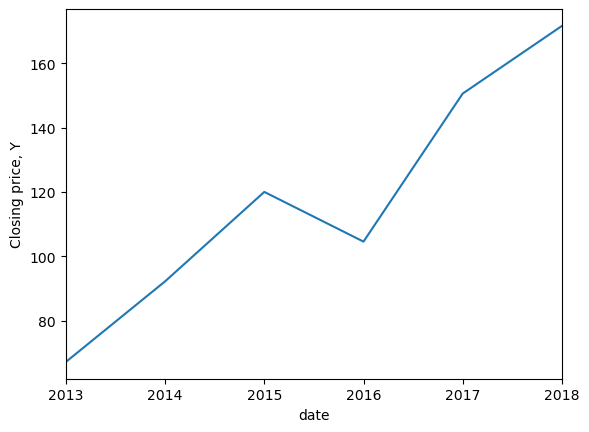

In [91]:
apple['close'].resample('Y').mean().plot()
plt.ylabel('Closing price, Y')
plt.show()

In [89]:
apple['close'].resample('Q').mean()  ## resample data on Quarterly basis

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: QE-DEC, Name: close, dtype: float64

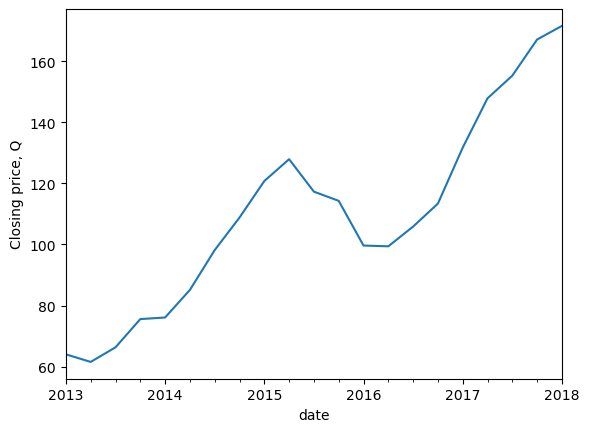

In [93]:
apple['close'].resample('Q').mean().plot()
plt.ylabel('Closing price, Q')
plt.show()

6. Whether closing prices of these tech companies (Amazon, Apple, Google, Microsoft) are correlated or not

In [97]:
company_list

['/Users/sviatlana_antonava/DA/DA Real-World projects/S&P Stock (time series project)/individual_stocks_5yr/AAPL_data.csv',
 '/Users/sviatlana_antonava/DA/DA Real-World projects/S&P Stock (time series project)/individual_stocks_5yr/AMZN_data.csv',
 '/Users/sviatlana_antonava/DA/DA Real-World projects/S&P Stock (time series project)/individual_stocks_5yr/GOOG_data.csv',
 '/Users/sviatlana_antonava/DA/DA Real-World projects/S&P Stock (time series project)/individual_stocks_5yr/MSFT_data.csv']

In [99]:
app = pd.read_csv(company_list[0])
amz = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [101]:
closing_price = pd.DataFrame()

In [103]:
closing_price['apple_close'] = app['close']
closing_price['amz_close'] = amz['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [132]:
closing_price

apple_close  amz_close  goog_close  msft_close
0         67.8542     261.95      558.46       27.55
1         68.5614     257.21      559.99       27.86
2         66.8428     258.70      556.97       27.88
3         66.7156     269.47      567.16       28.03
4         66.6556     269.24      567.00       28.04
...           ...        ...         ...         ...
1254     167.7800    1390.00         NaN       94.26
1255     160.5000    1429.95         NaN       91.78
1256     156.4900    1390.00         NaN       88.00
1257     163.0300    1442.84         NaN       91.33
1258     159.5400    1416.78         NaN       89.61

[1259 rows x 4 columns]

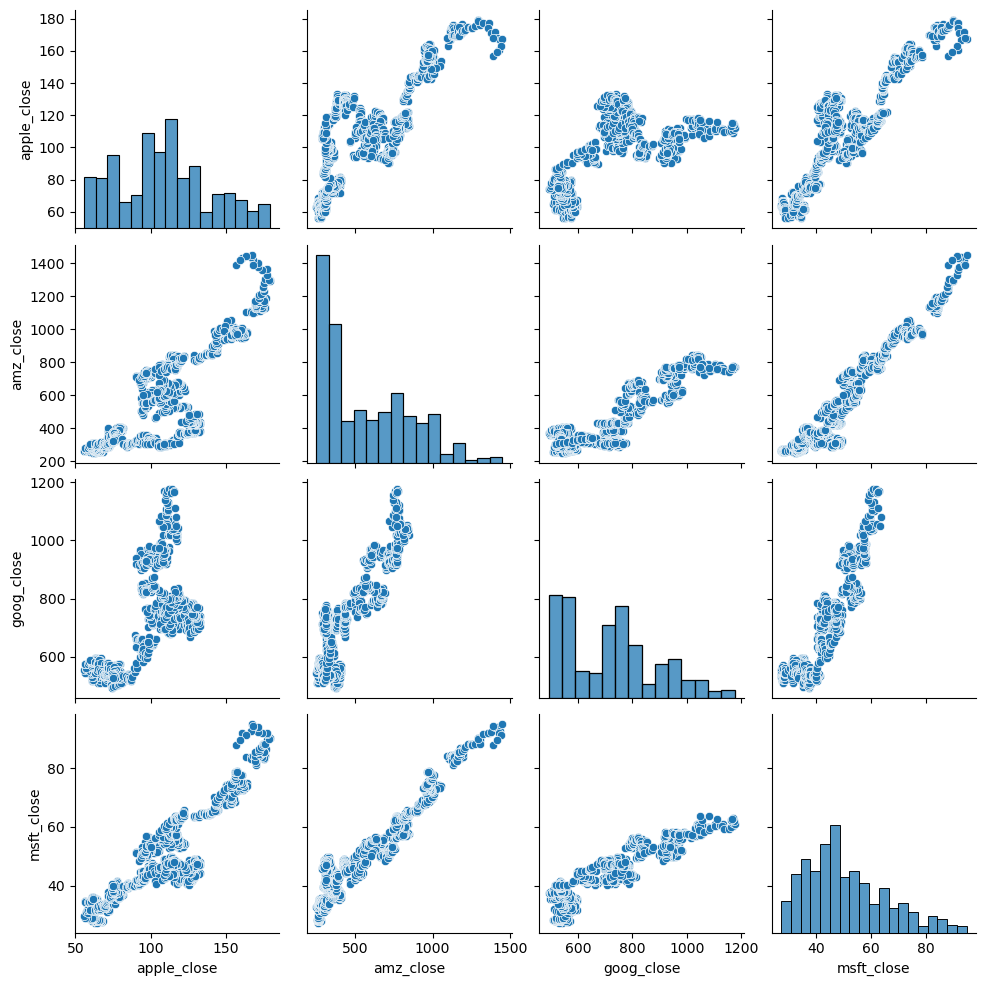

In [107]:
sns.pairplot(closing_price)
plt.show()

In [109]:
closing_price.corr()

apple_close  amz_close  goog_close  msft_close
apple_close     1.000000   0.819078    0.640522    0.899689
amz_close       0.819078   1.000000    0.888456    0.955977
goog_close      0.640522   0.888456    1.000000    0.907011
msft_close      0.899689   0.955977    0.907011    1.000000

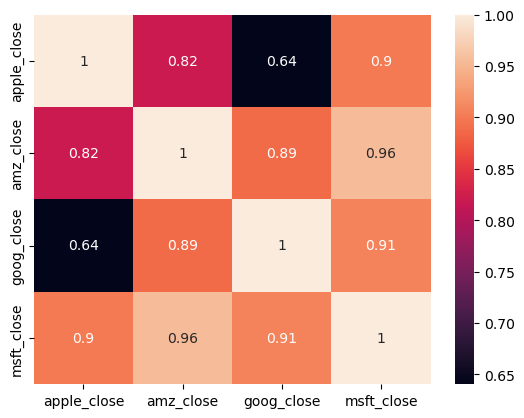

In [111]:
sns.heatmap(closing_price.corr(), annot=True)
plt.show()  

Closing price of Google/Microsoft are well correlated (0.91)
Closing price of Amazon/Microsoft have a co-relation of 0.96

7. Analyse whether Daily change in Closing price of stocks or Daily Returns in Stock are co-related or not

In [113]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [115]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [117]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1)) / closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [119]:
closing_price.columns

Index(['apple_close', 'amz_close', 'goog_close', 'msft_close'], dtype='object')

In [121]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1)) / closing_price[col].shift(1) * 100

In [123]:
closing_price

apple_close  amz_close  goog_close  msft_close  apple_close_pct_change  \
0         67.8542     261.95      558.46       27.55                     NaN   
1         68.5614     257.21      559.99       27.86                1.042235   
2         66.8428     258.70      556.97       27.88               -2.506658   
3         66.7156     269.47      567.16       28.03               -0.190297   
4         66.6556     269.24      567.00       28.04               -0.089934   
...           ...        ...         ...         ...                     ...   
1254     167.7800    1390.00         NaN       94.26                0.209043   
1255     160.5000    1429.95         NaN       91.78               -4.339015   
1256     156.4900    1390.00         NaN       88.00               -2.498442   
1257     163.0300    1442.84         NaN       91.33                4.179181   
1258     159.5400    1416.78         NaN       89.61               -2.140710   

      amz_close_pct_change  goog_close_pct_change  msft_close_pct_change  
0                      NaN                    NaN                    NaN  
1                -1.809506               0.273968               1.125227  
2                 0.579293              -0.539295               0.071788  
3                 4.163123               1.829542               0.538020  
4                -0.085353              -0.028211               0.035676  
...                    ...                    ...                    ...  
1254             -4.196734                    NaN              -0.789391  
1255              2.874101                    NaN              -2.631021  
1256             -2.793804                    NaN              -4.118544  
1257              3.801439                    NaN               3.784091  
1258             -1.806160                    NaN              -1.883280  

[1259 rows x 8 columns]

In [125]:
closing_p = closing_price[['apple_close_pct_change', 'amz_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

In [127]:
closing_p

apple_close_pct_change  amz_close_pct_change  goog_close_pct_change  \
0                        NaN                   NaN                    NaN   
1                   1.042235             -1.809506               0.273968   
2                  -2.506658              0.579293              -0.539295   
3                  -0.190297              4.163123               1.829542   
4                  -0.089934             -0.085353              -0.028211   
...                      ...                   ...                    ...   
1254                0.209043             -4.196734                    NaN   
1255               -4.339015              2.874101                    NaN   
1256               -2.498442             -2.793804                    NaN   
1257                4.179181              3.801439                    NaN   
1258               -2.140710             -1.806160                    NaN   

      msft_close_pct_change  
0                       NaN  
1                  1.125227  
2                  0.071788  
3                  0.538020  
4                  0.035676  
...                     ...  
1254              -0.789391  
1255              -2.631021  
1256              -4.118544  
1257               3.784091  
1258              -1.883280  

[1259 rows x 4 columns]

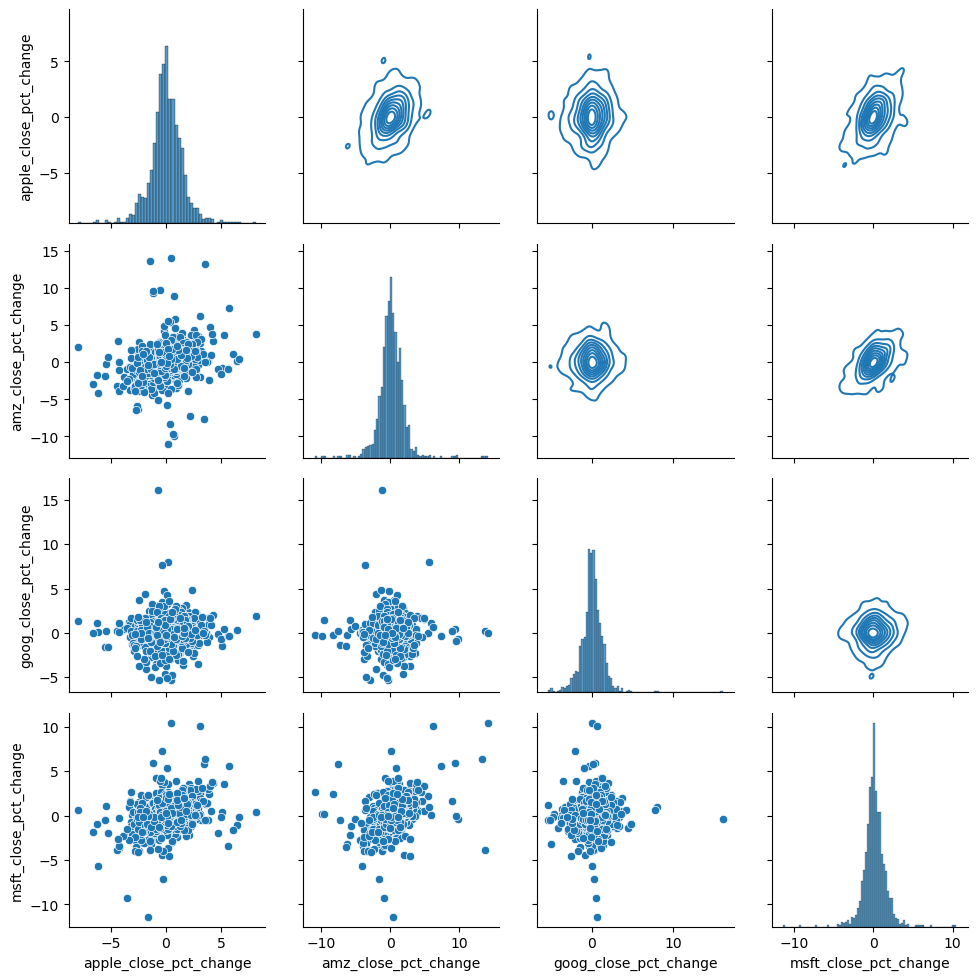

In [131]:
g = sns.PairGrid(data = closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
plt.show()  ##  While Comparing 'AAPL_close_pct_change' to 'AMZN_close_pct_change', it shows a linear relationship upto some extent

In [133]:
closing_p.corr()  ## low correlation level

apple_close_pct_change  amz_close_pct_change  \
apple_close_pct_change                1.000000              0.287659   
amz_close_pct_change                  0.287659              1.000000   
goog_close_pct_change                 0.036202              0.027698   
msft_close_pct_change                 0.366598              0.402678   

                        goog_close_pct_change  msft_close_pct_change  
apple_close_pct_change               0.036202               0.366598  
amz_close_pct_change                 0.027698               0.402678  
goog_close_pct_change                1.000000               0.038939  
msft_close_pct_change                0.038939               1.000000